# AutoEncoder network

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True)

In [3]:
raw_data = pd.read_csv('/Users/jianpeng/Desktop/Sciml/data/diabetes.csv')
display(raw_data.head())
print(raw_data.Outcome.value_counts())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64


In [4]:
x_train, x_test, y_train, y_test = train_test_split(raw_data.drop('Outcome',axis=1), raw_data.Outcome, test_size=0.15, stratify=raw_data.Outcome)

In [5]:
train_min = x_train.min()
train_max = x_train.max()
x_train = (x_train - train_min) / (train_max - train_min)
x_test = (x_test - train_min) / (train_max - train_min)

In [6]:
positives = x_train[y_train == 1]
negatives = x_train[y_train == 0]

## The AutoEncoder Architecture

In [7]:
## input layer 
input_layer = Input(shape=negatives.shape[1:])

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(75, activation='tanh')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(25, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(7, activation='relu')(encoded)

## decoding part
decoded = Dense(7, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(75, activation='tanh')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(negatives.shape[1], activation='relu')(decoded)

In [8]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

We train the autoencoder only over the negative examples in training set (persons without diabetes). The idea is, if the network is able to accurately learn to represent these records, it should misfire for the positive records.

In [9]:
autoencoder.fit(negatives, negatives, batch_size = 15, epochs = 1000, shuffle = True)

Epoch 1/1000


2022-10-20 14:44:51.160290: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 1s 1ms/step - loss: 0.2538
Epoch 2/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2474
Epoch 3/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2438
Epoch 4/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2497
Epoch 5/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2393
Epoch 6/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2422
Epoch 7/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2303
Epoch 8/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2331
Epoch 9/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2222
Epoch 10/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 11/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2393
Epoch 12/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.2261
Epoch 13/1000
29/29 [=================

29/29 [==============================] - 0s 995us/step - loss: 0.1574
Epoch 102/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1567
Epoch 103/1000
29/29 [==============================] - 0s 994us/step - loss: 0.1516
Epoch 104/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1560
Epoch 105/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1591
Epoch 106/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1507
Epoch 107/1000
29/29 [==============================] - 0s 990us/step - loss: 0.1551
Epoch 108/1000
29/29 [==============================] - 0s 956us/step - loss: 0.1599
Epoch 109/1000
29/29 [==============================] - 0s 957us/step - loss: 0.1496
Epoch 110/1000
29/29 [==============================] - 0s 998us/step - loss: 0.1509
Epoch 111/1000
29/29 [==============================] - 0s 978us/step - loss: 0.1488
Epoch 112/1000
29/29 [==============================] - 0s 985us/step - loss: 0.1528
Epo

29/29 [==============================] - 0s 995us/step - loss: 0.1286
Epoch 199/1000
29/29 [==============================] - 0s 951us/step - loss: 0.1306
Epoch 200/1000
29/29 [==============================] - 0s 924us/step - loss: 0.1265
Epoch 201/1000
29/29 [==============================] - 0s 937us/step - loss: 0.1300
Epoch 202/1000
29/29 [==============================] - 0s 1000us/step - loss: 0.1237
Epoch 203/1000
29/29 [==============================] - 0s 978us/step - loss: 0.1226
Epoch 204/1000
29/29 [==============================] - 0s 980us/step - loss: 0.1183
Epoch 205/1000
29/29 [==============================] - 0s 945us/step - loss: 0.1215
Epoch 206/1000
29/29 [==============================] - 0s 974us/step - loss: 0.1285
Epoch 207/1000
29/29 [==============================] - 0s 952us/step - loss: 0.1228
Epoch 208/1000
29/29 [==============================] - 0s 943us/step - loss: 0.1257
Epoch 209/1000
29/29 [==============================] - 0s 984us/step - loss: 0

29/29 [==============================] - 0s 1ms/step - loss: 0.1099
Epoch 296/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1125
Epoch 297/1000
29/29 [==============================] - 0s 999us/step - loss: 0.1100
Epoch 298/1000
29/29 [==============================] - 0s 962us/step - loss: 0.1133
Epoch 299/1000
29/29 [==============================] - 0s 953us/step - loss: 0.1078
Epoch 300/1000
29/29 [==============================] - 0s 963us/step - loss: 0.1105
Epoch 301/1000
29/29 [==============================] - 0s 982us/step - loss: 0.1123
Epoch 302/1000
29/29 [==============================] - 0s 959us/step - loss: 0.1114
Epoch 303/1000
29/29 [==============================] - 0s 965us/step - loss: 0.1094
Epoch 304/1000
29/29 [==============================] - 0s 997us/step - loss: 0.1050
Epoch 305/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1059
Epoch 306/1000
29/29 [==============================] - 0s 966us/step - loss: 0.1084
E

29/29 [==============================] - 0s 987us/step - loss: 0.1007
Epoch 393/1000
29/29 [==============================] - 0s 978us/step - loss: 0.1048
Epoch 394/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0983
Epoch 395/1000
29/29 [==============================] - 0s 983us/step - loss: 0.1047
Epoch 396/1000
29/29 [==============================] - 0s 944us/step - loss: 0.1002
Epoch 397/1000
29/29 [==============================] - 0s 956us/step - loss: 0.1029
Epoch 398/1000
29/29 [==============================] - 0s 938us/step - loss: 0.0997
Epoch 399/1000
29/29 [==============================] - 0s 987us/step - loss: 0.1067
Epoch 400/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.1037
Epoch 401/1000
29/29 [==============================] - 0s 962us/step - loss: 0.0997
Epoch 402/1000
29/29 [==============================] - 0s 989us/step - loss: 0.1061
Epoch 403/1000
29/29 [==============================] - 0s 955us/step - loss: 0.1050

29/29 [==============================] - 0s 1ms/step - loss: 0.0981
Epoch 490/1000
29/29 [==============================] - 0s 961us/step - loss: 0.0945
Epoch 491/1000
29/29 [==============================] - 0s 974us/step - loss: 0.0950
Epoch 492/1000
29/29 [==============================] - 0s 993us/step - loss: 0.0921
Epoch 493/1000
29/29 [==============================] - 0s 939us/step - loss: 0.0985
Epoch 494/1000
29/29 [==============================] - 0s 936us/step - loss: 0.0967
Epoch 495/1000
29/29 [==============================] - 0s 967us/step - loss: 0.0954
Epoch 496/1000
29/29 [==============================] - 0s 982us/step - loss: 0.0972
Epoch 497/1000
29/29 [==============================] - 0s 927us/step - loss: 0.0972
Epoch 498/1000
29/29 [==============================] - 0s 920us/step - loss: 0.0988
Epoch 499/1000
29/29 [==============================] - 0s 974us/step - loss: 0.0940
Epoch 500/1000
29/29 [==============================] - 0s 952us/step - loss: 0.09

29/29 [==============================] - 0s 987us/step - loss: 0.0908
Epoch 587/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 588/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0958
Epoch 589/1000
29/29 [==============================] - 0s 994us/step - loss: 0.0897
Epoch 590/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 591/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0908
Epoch 592/1000
29/29 [==============================] - 0s 992us/step - loss: 0.0919
Epoch 593/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0942
Epoch 594/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0890
Epoch 595/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0943
Epoch 596/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0921
Epoch 597/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0905
Epoch 598/100

29/29 [==============================] - 0s 1ms/step - loss: 0.0898
Epoch 684/1000
29/29 [==============================] - 0s 990us/step - loss: 0.0875
Epoch 685/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0918
Epoch 686/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0914
Epoch 687/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0876
Epoch 688/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0879
Epoch 689/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0912
Epoch 690/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0871
Epoch 691/1000
29/29 [==============================] - 0s 965us/step - loss: 0.0915
Epoch 692/1000
29/29 [==============================] - 0s 970us/step - loss: 0.0870
Epoch 693/1000
29/29 [==============================] - 0s 986us/step - loss: 0.0855
Epoch 694/1000
29/29 [==============================] - 0s 941us/step - loss: 0.0890
Epoch 695

29/29 [==============================] - 0s 1ms/step - loss: 0.0841
Epoch 781/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 782/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0858
Epoch 783/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0880
Epoch 784/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0855
Epoch 785/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0857
Epoch 786/1000
29/29 [==============================] - 0s 994us/step - loss: 0.0845
Epoch 787/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0859
Epoch 788/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0867
Epoch 789/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0869
Epoch 790/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0823
Epoch 791/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 792/1000
29

29/29 [==============================] - 0s 908us/step - loss: 0.0813
Epoch 878/1000
29/29 [==============================] - 0s 951us/step - loss: 0.0838
Epoch 879/1000
29/29 [==============================] - 0s 919us/step - loss: 0.0834
Epoch 880/1000
29/29 [==============================] - 0s 978us/step - loss: 0.0838
Epoch 881/1000
29/29 [==============================] - 0s 962us/step - loss: 0.0860
Epoch 882/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0816
Epoch 883/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 884/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 885/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0802
Epoch 886/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0812
Epoch 887/1000
29/29 [==============================] - 0s 990us/step - loss: 0.0821
Epoch 888/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0805
Epoch 8

Epoch 975/1000
29/29 [==============================] - 0s 970us/step - loss: 0.0795
Epoch 976/1000
29/29 [==============================] - 0s 948us/step - loss: 0.0805
Epoch 977/1000
29/29 [==============================] - 0s 929us/step - loss: 0.0811
Epoch 978/1000
29/29 [==============================] - 0s 916us/step - loss: 0.0788
Epoch 979/1000
29/29 [==============================] - 0s 927us/step - loss: 0.0813
Epoch 980/1000
29/29 [==============================] - 0s 943us/step - loss: 0.0778
Epoch 981/1000
29/29 [==============================] - 0s 932us/step - loss: 0.0776
Epoch 982/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0804
Epoch 983/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0813
Epoch 984/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0784
Epoch 985/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.0800
Epoch 986/1000
29/29 [==============================] - 0s 1ms/step - los

## Transforming the Data

In [10]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])
hidden_representation.add(autoencoder.layers[5])
hidden_representation.add(autoencoder.layers[6])
hidden_representation.add(autoencoder.layers[7])
hidden_representation.add(autoencoder.layers[8])
hidden_representation.add(autoencoder.layers[9])

In [11]:
x_train_transformed = hidden_representation.predict(x_train)
x_test_transformed = hidden_representation.predict(x_test)

4/4 [==============================] - 0s 641us/step


## Prediction

In [12]:
predictor = Sequential()
predictor.add(Dense(64, activation='relu', input_shape=x_train_transformed.shape[1:]))
predictor.add(BatchNormalization())
predictor.add(Dropout(0.25))
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='tanh'))
predictor.add(BatchNormalization())
predictor.add(Dense(1, activation='sigmoid'))

In [13]:
predictor.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
predictor.fit(x_train_transformed, y_train, batch_size=10, epochs=1000, shuffle=True)

Epoch 1/1000
66/66 [==============================] - 1s 1ms/step - loss: 0.7409 - accuracy: 0.5706
Epoch 2/1000
66/66 [==============================] - 0s 955us/step - loss: 0.6416 - accuracy: 0.6488
Epoch 3/1000
66/66 [==============================] - 0s 937us/step - loss: 0.6203 - accuracy: 0.6595
Epoch 4/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.6626
Epoch 5/1000
66/66 [==============================] - 0s 964us/step - loss: 0.5993 - accuracy: 0.6626
Epoch 6/1000
66/66 [==============================] - 0s 983us/step - loss: 0.5877 - accuracy: 0.7132
Epoch 7/1000
66/66 [==============================] - 0s 958us/step - loss: 0.6342 - accuracy: 0.6534
Epoch 8/1000
66/66 [==============================] - 0s 952us/step - loss: 0.5985 - accuracy: 0.6902
Epoch 9/1000
66/66 [==============================] - 0s 949us/step - loss: 0.6017 - accuracy: 0.6825
Epoch 10/1000
66/66 [==============================] - 0s 963us/step - loss: 0.5857 - 

66/66 [==============================] - 0s 900us/step - loss: 0.5334 - accuracy: 0.7147
Epoch 81/1000
66/66 [==============================] - 0s 895us/step - loss: 0.5468 - accuracy: 0.7393
Epoch 82/1000
66/66 [==============================] - 0s 911us/step - loss: 0.5506 - accuracy: 0.7224
Epoch 83/1000
66/66 [==============================] - 0s 898us/step - loss: 0.5480 - accuracy: 0.7209
Epoch 84/1000
66/66 [==============================] - 0s 903us/step - loss: 0.5417 - accuracy: 0.7101
Epoch 85/1000
66/66 [==============================] - 0s 913us/step - loss: 0.5345 - accuracy: 0.7423
Epoch 86/1000
66/66 [==============================] - 0s 908us/step - loss: 0.5473 - accuracy: 0.7071
Epoch 87/1000
66/66 [==============================] - 0s 903us/step - loss: 0.5508 - accuracy: 0.7055
Epoch 88/1000
66/66 [==============================] - 0s 950us/step - loss: 0.5365 - accuracy: 0.7163
Epoch 89/1000
66/66 [==============================] - 0s 940us/step - loss: 0.5329 - a

66/66 [==============================] - 0s 922us/step - loss: 0.5072 - accuracy: 0.7592
Epoch 160/1000
66/66 [==============================] - 0s 914us/step - loss: 0.5312 - accuracy: 0.7132
Epoch 161/1000
66/66 [==============================] - 0s 907us/step - loss: 0.5300 - accuracy: 0.7178
Epoch 162/1000
66/66 [==============================] - 0s 910us/step - loss: 0.5079 - accuracy: 0.7393
Epoch 163/1000
66/66 [==============================] - 0s 930us/step - loss: 0.5140 - accuracy: 0.7439
Epoch 164/1000
66/66 [==============================] - 0s 914us/step - loss: 0.4908 - accuracy: 0.7439
Epoch 165/1000
66/66 [==============================] - 0s 908us/step - loss: 0.4953 - accuracy: 0.7561
Epoch 166/1000
66/66 [==============================] - 0s 909us/step - loss: 0.5012 - accuracy: 0.7362
Epoch 167/1000
66/66 [==============================] - 0s 908us/step - loss: 0.5025 - accuracy: 0.7531
Epoch 168/1000
66/66 [==============================] - 0s 911us/step - loss: 0

66/66 [==============================] - 0s 899us/step - loss: 0.4989 - accuracy: 0.7316
Epoch 238/1000
66/66 [==============================] - 0s 893us/step - loss: 0.4619 - accuracy: 0.7899
Epoch 239/1000
66/66 [==============================] - 0s 901us/step - loss: 0.4817 - accuracy: 0.7715
Epoch 240/1000
66/66 [==============================] - 0s 893us/step - loss: 0.4961 - accuracy: 0.7577
Epoch 241/1000
66/66 [==============================] - 0s 894us/step - loss: 0.5111 - accuracy: 0.7331
Epoch 242/1000
66/66 [==============================] - 0s 962us/step - loss: 0.4620 - accuracy: 0.7715
Epoch 243/1000
66/66 [==============================] - 0s 927us/step - loss: 0.4672 - accuracy: 0.7592
Epoch 244/1000
66/66 [==============================] - 0s 914us/step - loss: 0.4801 - accuracy: 0.7684
Epoch 245/1000
66/66 [==============================] - 0s 899us/step - loss: 0.4944 - accuracy: 0.7592
Epoch 246/1000
66/66 [==============================] - 0s 918us/step - loss: 0

Epoch 316/1000
66/66 [==============================] - 0s 919us/step - loss: 0.4633 - accuracy: 0.7791
Epoch 317/1000
66/66 [==============================] - 0s 908us/step - loss: 0.4682 - accuracy: 0.7684
Epoch 318/1000
66/66 [==============================] - 0s 904us/step - loss: 0.4905 - accuracy: 0.7715
Epoch 319/1000
66/66 [==============================] - 0s 902us/step - loss: 0.4872 - accuracy: 0.7669
Epoch 320/1000
66/66 [==============================] - 0s 913us/step - loss: 0.4805 - accuracy: 0.7853
Epoch 321/1000
66/66 [==============================] - 0s 916us/step - loss: 0.4772 - accuracy: 0.7776
Epoch 322/1000
66/66 [==============================] - 0s 904us/step - loss: 0.4983 - accuracy: 0.7515
Epoch 323/1000
66/66 [==============================] - 0s 894us/step - loss: 0.4763 - accuracy: 0.7638
Epoch 324/1000
66/66 [==============================] - 0s 911us/step - loss: 0.4677 - accuracy: 0.7715
Epoch 325/1000
66/66 [==============================] - 0s 919us

66/66 [==============================] - 0s 930us/step - loss: 0.4393 - accuracy: 0.7960
Epoch 395/1000
66/66 [==============================] - 0s 912us/step - loss: 0.4362 - accuracy: 0.7776
Epoch 396/1000
66/66 [==============================] - 0s 914us/step - loss: 0.4464 - accuracy: 0.7776
Epoch 397/1000
66/66 [==============================] - 0s 920us/step - loss: 0.4570 - accuracy: 0.7791
Epoch 398/1000
66/66 [==============================] - 0s 921us/step - loss: 0.4376 - accuracy: 0.7960
Epoch 399/1000
66/66 [==============================] - 0s 915us/step - loss: 0.4523 - accuracy: 0.7837
Epoch 400/1000
66/66 [==============================] - 0s 910us/step - loss: 0.4631 - accuracy: 0.7684
Epoch 401/1000
66/66 [==============================] - 0s 923us/step - loss: 0.4307 - accuracy: 0.8083
Epoch 402/1000
66/66 [==============================] - 0s 905us/step - loss: 0.4614 - accuracy: 0.7822
Epoch 403/1000
66/66 [==============================] - 0s 967us/step - loss: 0

66/66 [==============================] - 0s 902us/step - loss: 0.4435 - accuracy: 0.7914
Epoch 473/1000
66/66 [==============================] - 0s 897us/step - loss: 0.4172 - accuracy: 0.8129
Epoch 474/1000
66/66 [==============================] - 0s 893us/step - loss: 0.4382 - accuracy: 0.7868
Epoch 475/1000
66/66 [==============================] - 0s 886us/step - loss: 0.4716 - accuracy: 0.7653
Epoch 476/1000
66/66 [==============================] - 0s 870us/step - loss: 0.4482 - accuracy: 0.7776
Epoch 477/1000
66/66 [==============================] - 0s 891us/step - loss: 0.4318 - accuracy: 0.7914
Epoch 478/1000
66/66 [==============================] - 0s 908us/step - loss: 0.4006 - accuracy: 0.8175
Epoch 479/1000
66/66 [==============================] - 0s 886us/step - loss: 0.4471 - accuracy: 0.7776
Epoch 480/1000
66/66 [==============================] - 0s 892us/step - loss: 0.4271 - accuracy: 0.7960
Epoch 481/1000
66/66 [==============================] - 0s 895us/step - loss: 0

66/66 [==============================] - 0s 890us/step - loss: 0.3995 - accuracy: 0.8221
Epoch 551/1000
66/66 [==============================] - 0s 901us/step - loss: 0.4374 - accuracy: 0.7991
Epoch 552/1000
66/66 [==============================] - 0s 896us/step - loss: 0.4152 - accuracy: 0.8113
Epoch 553/1000
66/66 [==============================] - 0s 878us/step - loss: 0.4483 - accuracy: 0.7669
Epoch 554/1000
66/66 [==============================] - 0s 890us/step - loss: 0.4511 - accuracy: 0.7546
Epoch 555/1000
66/66 [==============================] - 0s 890us/step - loss: 0.4305 - accuracy: 0.7883
Epoch 556/1000
66/66 [==============================] - 0s 883us/step - loss: 0.4219 - accuracy: 0.7929
Epoch 557/1000
66/66 [==============================] - 0s 886us/step - loss: 0.4407 - accuracy: 0.8021
Epoch 558/1000
66/66 [==============================] - 0s 891us/step - loss: 0.4483 - accuracy: 0.7837
Epoch 559/1000
66/66 [==============================] - 0s 896us/step - loss: 0

Epoch 629/1000
66/66 [==============================] - 0s 916us/step - loss: 0.4250 - accuracy: 0.8037
Epoch 630/1000
66/66 [==============================] - 0s 921us/step - loss: 0.4351 - accuracy: 0.7883
Epoch 631/1000
66/66 [==============================] - 0s 915us/step - loss: 0.4260 - accuracy: 0.8052
Epoch 632/1000
66/66 [==============================] - 0s 912us/step - loss: 0.4623 - accuracy: 0.7561
Epoch 633/1000
66/66 [==============================] - 0s 918us/step - loss: 0.4123 - accuracy: 0.8282
Epoch 634/1000
66/66 [==============================] - 0s 906us/step - loss: 0.4341 - accuracy: 0.8052
Epoch 635/1000
66/66 [==============================] - 0s 907us/step - loss: 0.4174 - accuracy: 0.8052
Epoch 636/1000
66/66 [==============================] - 0s 914us/step - loss: 0.3858 - accuracy: 0.8267
Epoch 637/1000
66/66 [==============================] - 0s 916us/step - loss: 0.4334 - accuracy: 0.7776
Epoch 638/1000
66/66 [==============================] - 0s 902us

66/66 [==============================] - 0s 936us/step - loss: 0.4225 - accuracy: 0.7868
Epoch 708/1000
66/66 [==============================] - 0s 918us/step - loss: 0.4236 - accuracy: 0.8129
Epoch 709/1000
66/66 [==============================] - 0s 909us/step - loss: 0.4229 - accuracy: 0.8006
Epoch 710/1000
66/66 [==============================] - 0s 904us/step - loss: 0.4009 - accuracy: 0.8175
Epoch 711/1000
66/66 [==============================] - 0s 905us/step - loss: 0.4112 - accuracy: 0.8037
Epoch 712/1000
66/66 [==============================] - 0s 910us/step - loss: 0.4052 - accuracy: 0.8160
Epoch 713/1000
66/66 [==============================] - 0s 908us/step - loss: 0.4241 - accuracy: 0.7929
Epoch 714/1000
66/66 [==============================] - 0s 919us/step - loss: 0.4050 - accuracy: 0.7991
Epoch 715/1000
66/66 [==============================] - 0s 926us/step - loss: 0.4150 - accuracy: 0.8021
Epoch 716/1000
66/66 [==============================] - 0s 916us/step - loss: 0

Epoch 786/1000
66/66 [==============================] - 0s 930us/step - loss: 0.4204 - accuracy: 0.7929
Epoch 787/1000
66/66 [==============================] - 0s 923us/step - loss: 0.4277 - accuracy: 0.7791
Epoch 788/1000
66/66 [==============================] - 0s 924us/step - loss: 0.4014 - accuracy: 0.8144
Epoch 789/1000
66/66 [==============================] - 0s 912us/step - loss: 0.4039 - accuracy: 0.8098
Epoch 790/1000
66/66 [==============================] - 0s 913us/step - loss: 0.4139 - accuracy: 0.8052
Epoch 791/1000
66/66 [==============================] - 0s 908us/step - loss: 0.3985 - accuracy: 0.8067
Epoch 792/1000
66/66 [==============================] - 0s 917us/step - loss: 0.4148 - accuracy: 0.7945
Epoch 793/1000
66/66 [==============================] - 0s 905us/step - loss: 0.4256 - accuracy: 0.7899
Epoch 794/1000
66/66 [==============================] - 0s 913us/step - loss: 0.4092 - accuracy: 0.8190
Epoch 795/1000
66/66 [==============================] - 0s 925us

66/66 [==============================] - 0s 928us/step - loss: 0.4019 - accuracy: 0.8221
Epoch 865/1000
66/66 [==============================] - 0s 921us/step - loss: 0.4193 - accuracy: 0.7929
Epoch 866/1000
66/66 [==============================] - 0s 921us/step - loss: 0.4023 - accuracy: 0.8175
Epoch 867/1000
66/66 [==============================] - 0s 908us/step - loss: 0.4079 - accuracy: 0.8129
Epoch 868/1000
66/66 [==============================] - 0s 929us/step - loss: 0.4071 - accuracy: 0.8190
Epoch 869/1000
66/66 [==============================] - 0s 913us/step - loss: 0.3912 - accuracy: 0.8359
Epoch 870/1000
66/66 [==============================] - 0s 923us/step - loss: 0.4129 - accuracy: 0.8067
Epoch 871/1000
66/66 [==============================] - 0s 914us/step - loss: 0.3858 - accuracy: 0.8098
Epoch 872/1000
66/66 [==============================] - 0s 927us/step - loss: 0.3903 - accuracy: 0.8236
Epoch 873/1000
66/66 [==============================] - 0s 924us/step - loss: 0

66/66 [==============================] - 0s 909us/step - loss: 0.3799 - accuracy: 0.8267
Epoch 943/1000
66/66 [==============================] - 0s 930us/step - loss: 0.3585 - accuracy: 0.8405
Epoch 944/1000
66/66 [==============================] - 0s 921us/step - loss: 0.3912 - accuracy: 0.8037
Epoch 945/1000
66/66 [==============================] - 0s 908us/step - loss: 0.4013 - accuracy: 0.7960
Epoch 946/1000
66/66 [==============================] - 0s 928us/step - loss: 0.3964 - accuracy: 0.8113
Epoch 947/1000
66/66 [==============================] - 0s 907us/step - loss: 0.3916 - accuracy: 0.8298
Epoch 948/1000
66/66 [==============================] - 0s 935us/step - loss: 0.3860 - accuracy: 0.8221
Epoch 949/1000
66/66 [==============================] - 0s 914us/step - loss: 0.3632 - accuracy: 0.8359
Epoch 950/1000
66/66 [==============================] - 0s 909us/step - loss: 0.3883 - accuracy: 0.8175
Epoch 951/1000
66/66 [==============================] - 0s 953us/step - loss: 0

# Test

In [14]:
y_predict = predictor.predict(x_test_transformed)

4/4 [==============================] - 0s 665us/step


In [15]:
print(classification_report(y_test, y_predict >= 0.35))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68        76
           1       0.43      0.50      0.46        40

    accuracy                           0.59       116
   macro avg       0.57      0.57      0.57       116
weighted avg       0.61      0.59      0.60       116



## Gradients

In [120]:
with tf.GradientTape() as g:
    x_test_transformed = tf.convert_to_tensor(x_test_transformed)
    g.watch(x_test_transformed)
    y_predict = predictor(x_test_transformed)
    grads = g.gradient(y_predict, x_test_transformed)

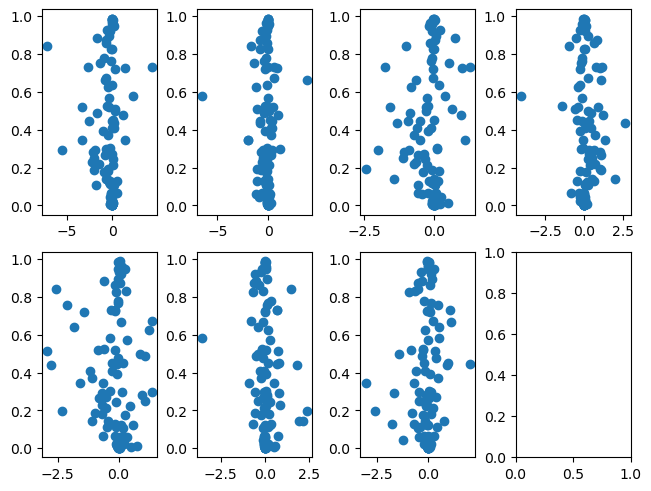

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [124]:
fig, axs = plt.subplots(2,4,constrained_layout=True,dpi=100)
for idex in range(7):
    x = grads.numpy()[:,idex]
    y = np.squeeze(y_predict.numpy())
    plt.figure()
    axs[idex//4,idex%4].scatter(x, y)